error:32885.3
merror:0.87


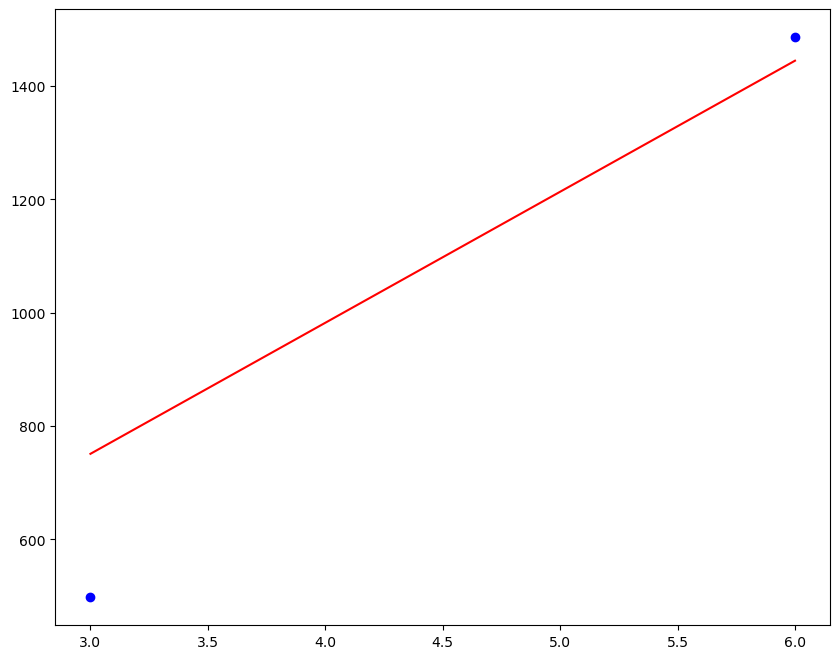

In [2]:
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import CubicSpline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge

sample_data={'Price':[231,365,498,1100,1354,1486,1818,1949,1978,2300],'Volume':[1,2,3,4,5,6,7,8,9,10]}
sample_data_df=pandas.DataFrame(sample_data)

#plt.scatter(sample_data_df['Volume'],sample_data_df['Price'])
#divide the data

X_train,X_test,Y_train,Y_test=train_test_split(sample_data_df['Volume'],sample_data_df['Price'],test_size=0.20)
# OUTPUTS ARE PANDAS SERIES
simple_linear_regression=LinearRegression()
# X_train=X_train.values
# Y_train=Y_train.values
# X_test=X_test.values
# print(type(X_train))
X_train=pandas.DataFrame(X_train)
Y_train=pandas.DataFrame(Y_train)

simple_linear_regression.fit(X_train,Y_train)
#above fit function expects dataframe or 2D np array.

Y_pred=simple_linear_regression.predict(pandas.DataFrame(X_test))

plt.scatter(X_test,Y_test,color='Blue')
plt.plot(X_test,Y_pred,color='Red')

#metrics

M_S_E=mean_squared_error(Y_test,Y_pred)
R2=r2_score(Y_test,Y_pred)
print("error:%.1f"%M_S_E)

print("merror:%.2f"%R2)

In [30]:
#Correlation 
import warnings
warnings.filterwarnings('ignore')
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
from sklearn.pipeline import make_pipeline


boston_data=load_boston()

#to get keys of the dictionary dataset
# print(boston_data.keys()) 
#gets decription from dataset using DESCR key
# print(boston_data['DESCR'])
#gets colums from dataset using feature_names key
# print(boston_data.feature_names) 

#creating dataframe
boston_df=pandas.DataFrame(boston_data.data,columns=boston_data.feature_names)
# boston_df.isnull().sum() - check if null values

boston_df['Price']=boston_data['target']

boston_data_X = boston_df[boston_df.columns[0:13]]
boston_data_Y = boston_df[boston_df.columns[13:14]]

#checking corerelation and visualizing it

# print(boston_data_X.corr())
# seaborn.heatmap(boston_data_X.corr())

# Create correlation matrix
abs_corr_matrix = boston_data_X.corr().abs()


# Select upper triangle of matrix, ignoring diagonol

up_tri=abs_corr_matrix.where(numpy.triu(numpy.ones(abs_corr_matrix.shape),k=1).astype(numpy.bool))

# select columns with values above 0.75

correlated_columns=[column for column in up_tri.columns if any(up_tri[column]>0.75)]

#drop these columns

boston_data_X=boston_data_X.drop(correlated_columns, axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(boston_data_X,boston_data_Y,test_size=0.2)

linear_regression=LinearRegression()

linear_regression.fit(X_test,Y_test)

Y_pred=linear_regression.predict(X_test)


# print('M_S_E %.2f' % mean_squared_error(Y_test, Y_pred))
# print('R2 score %.2f' % r2_score(Y_test, Y_pred))
# print('M_A_E %.1f' % mean_absolute_error(Y_test, Y_pred))

Y_test['pred']=Y_pred


Y_test['Difference']=abs(Y_test['pred'] - Y_test['Price'])

Y_test



                             
                             
                             

,Price,pred,Difference
462,19.5,24.123630,4.623630
54,18.9,17.091338,1.808662
314,23.8,26.667815,2.867815
205,22.6,20.966603,1.633397
18,20.2,15.304490,4.895510
...,...,...,...
47,16.6,17.049322,0.449322
455,14.1,16.076916,1.976916
210,21.7,24.231699,2.531699
172,23.1,21.442867,1.657133
